In [1]:
import airfoils as af
import matplotlib.pyplot as plt
import numpy as np
import potential as pot

# Airfoil

(-0.05, 1.05, -0.02690599321712555, 0.10552860438127433)

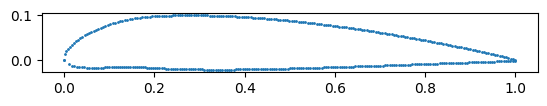

In [2]:
airfoil = af.Airfoil.NACA4("2412", n_points=200)
af_xs, af_ys = airfoil.all_points
plt.scatter(af_xs, af_ys, 1)
plt.axis('scaled')

# Wing Geometry

In [3]:
# Discretization
N = 50
M = 2

In [4]:
span = 6
spanDist = np.linspace(0, span, N)
chordDist = np.ones(N)
diheDist = np.zeros(N)
sweepDist = np.zeros(N)

wakeDist = 20 * chordDist

In [5]:
Umag = 16
alpha = 2 * np.pi/180
beta = 0
Uinf = Umag * np.cos(alpha) * np.cos(beta)
Vinf = Umag * np.cos(alpha) * np.sin(beta)
Winf = Umag * np.sin(alpha) * np.cos(beta)
Qinf = np.array((Uinf, Vinf, Winf))

# Discretization and Grid Generation

panels (3, 2, 50)


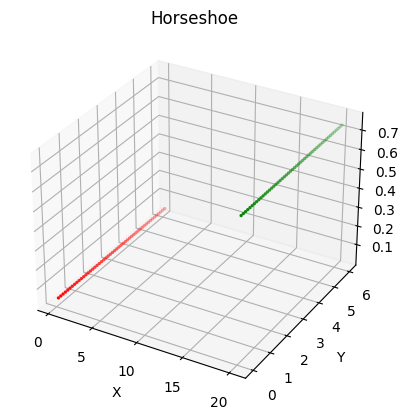

In [6]:
xs = np.empty((M, N))
ys = np.empty((M, N))
zs = np.empty((M, N))


xs[0, :] = sweepDist + chordDist/4
xs[1, :] = xs[0, :] + wakeDist
ys[0, :] = sweepDist + spanDist 
ys[1, :] = sweepDist + spanDist 
zs[0, :] = diheDist + airfoil.camber_line(chordDist / 4)
zs[1, :] = zs[0, :] + wakeDist * np.sin(alpha)

panels = np.array((xs, ys, zs))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xs[0,:], ys[0,:], zs[0,:], marker='.', color = 'r',linewidths=0.1)
ax.scatter(xs[1,:], ys[1,:], zs[1,:], marker='.', color = 'g',linewidths=0.1)

ax.set_title("Horseshoe")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
print(f"panels {panels.shape}")

## Normal Vectors

In [7]:
nj = np.repeat([(np.sin(alpha) * np.cos(beta),
                 np.cos(alpha) * np.sin(beta),
                 np.cos(alpha) * np.cos(beta))], (N-1)*(M-1), axis=0)


## Collocation Points

In [8]:
xcol = np.empty((M, N))
ycol = np.empty((M, N))
zcol = np.empty((M, N))


xcol[0, :] = sweepDist + airfoil.camber_line(3 * chordDist / 4)
ycol[0, :] = sweepDist + 3 * spanDist / 4
zcol[0, :] = diheDist
# plt.scatter(xcol[0,:],ycol[0,:])

## No penetration Formuation

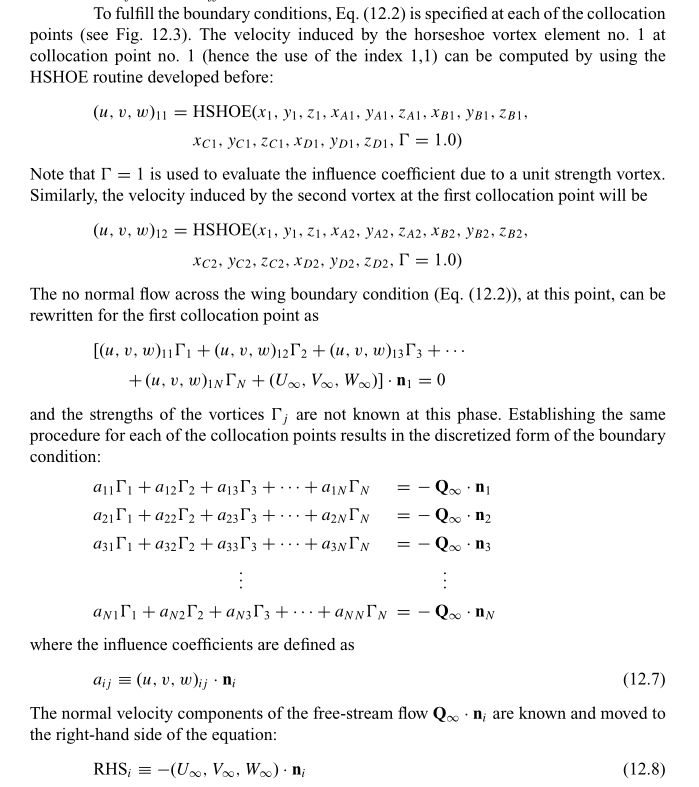

In [9]:
a_np = np.zeros(((N-1)*(M-1), (N-1)*(M-1)))
b_np = np.zeros(((N-1)*(M-1), (N-1)*(M-1)))
RHS_np = np.zeros((N-1)*(M-1))

for i in np.arange(0, N-1):
    RHS_np[i] = - np.dot(Qinf, nj[i])
    for j in np.arange(0, N-1):
        for k in np.arange(0, M-1):
            U, Ustar = pot.hshoe((xs[0, i] + xs[0, i+1])/2,
                              (ys[0, i] + ys[0, i+1])/2,
                              (zs[0, i] + zs[0, i+1])/2,
                              k,j, panels)
            
            a_np[i, j] = np.dot(U, nj[i])
            b_np[i, j] = np.dot(Ustar, nj[i])